In [76]:
#imports 
import pandas as pd
import numpy as np
import datetime
import geopy.distance
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import skew
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import diptest
from sklearn.utils.validation import column_or_1d
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from collections import OrderedDict
import csv
import imblearn
from imblearn.over_sampling import SMOTE,SMOTENC




In [78]:
df = pd.read_csv('fraudTrain.csv')
print(df.head())
#df.describe()

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [80]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [81]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [82]:
df['is_fraud'].unique()

array([0, 1], dtype=int64)

In [83]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [84]:
df_new = df[['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'merch_lat', 'merch_long', 'is_fraud']]

df_new.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [85]:
for cols in df_new.columns:
  print(cols,' ',df_new[cols].isna().sum())

trans_date_trans_time   0
cc_num   0
merchant   0
category   0
amt   0
gender   0
street   0
city   0
state   0
zip   0
lat   0
long   0
city_pop   0
job   0
dob   0
trans_num   0
merch_lat   0
merch_long   0
is_fraud   0


In [86]:
#remove that one row with Nan
df_new = df_new.dropna()

In [87]:
df.duplicated().sum()

0

In [88]:
df_new.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00


In [89]:
#df_new[df_new['merch_long'].isna()]

In [90]:
jobs = df_new['category']
jobs.value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [91]:
# function to calculate age
def calculate_age(dob):
    year_now = datetime.datetime.now().year
    dob_year = int(dob[:4])
    age = year_now - dob_year
    age_list.append(age)

In [92]:
# function call
age_list = []
for date in df_new['dob']:
  calculate_age(date)

In [93]:
# adding Age to the dataframe
df_new['Age'] = age_list

df_new['Age'].describe()

count    1.296675e+06
mean     5.074255e+01
std      1.737848e+01
min      1.900000e+01
25%      3.700000e+01
50%      4.900000e+01
75%      6.200000e+01
max      1.000000e+02
Name: Age, dtype: float64

In [94]:
df_new.columns


Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud',
       'Age'],
      dtype='object')

In [95]:
df_numeric_x = df_new[['cc_num','amt','zip','lat','long','city_pop','merch_lat','merch_long','Age']]
df_numeric_y = np.array(df_new['is_fraud'])

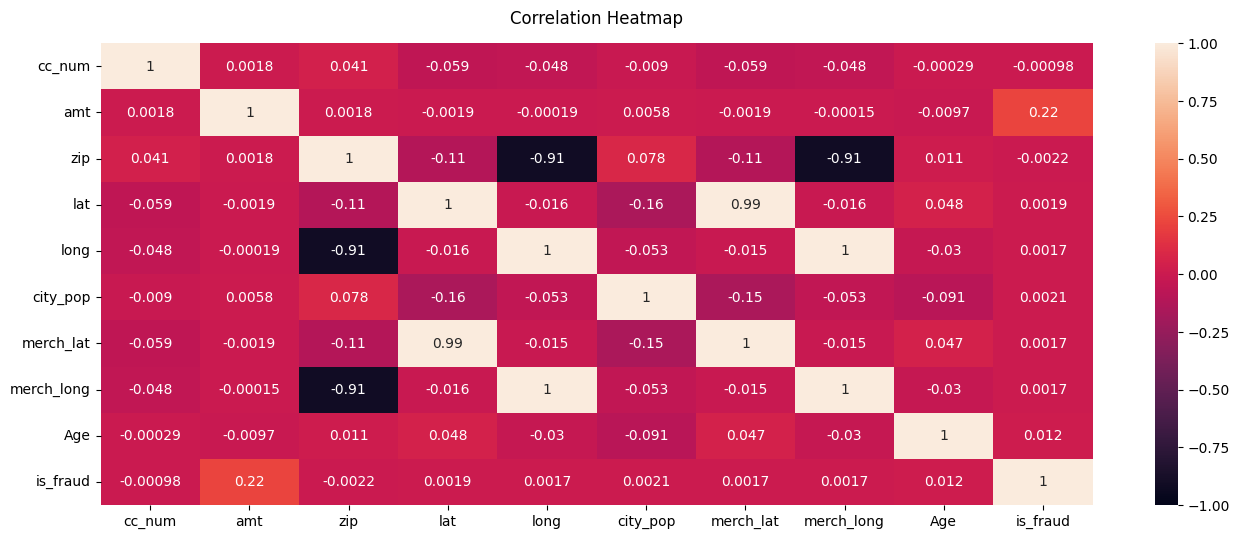

In [96]:
df_numeric = df_new[['cc_num','amt','zip','lat','long','city_pop','merch_lat','merch_long','Age','is_fraud']]
df_numeric.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_numeric.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=14);

In [97]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(df_numeric_x, list(df_new['is_fraud']))


RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [98]:
df_new.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud',
       'Age'],
      dtype='object')

In [99]:
#list(df_new['is_fraud'])

In [100]:
import numpy as np
print(np.__version__)


1.26.0


In [101]:
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(df_numeric_x.values, df_new['is_fraud'].values)

# check selected features
selected_features = feat_selector.support_

# Print the selected features

# check ranking of features
rank = feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	0


In [102]:
rank

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [103]:
selected_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [104]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(df_numeric_x.values)

In [105]:
transaction_time = df_new['trans_date_trans_time']
transaction_time.value_counts()
transaction_time[0][14:16]

transaction_category = []
for transaction in df_new['trans_date_trans_time']:
  if int(transaction[14:16]) < 12:
    transaction_category.append('Forenoon Transaction')
  else:
    transaction_category.append('Afternoon Transaction')


df_new['Transaction Category'] = transaction_category
df_new['Transaction Category'].value_counts()


Transaction Category
Afternoon Transaction    1037131
Forenoon Transaction      259544
Name: count, dtype: int64

In [106]:
distance = []
for i in range(len(df_new)):
  lat1 = df_new['lat'][i]
  lon1 = df_new['long'][i]
  lat2 = df_new['merch_lat'][i]
  lon2 = df_new['merch_long'][i]
  coords_1 = (lat1,lon1)
  coords_2 = (lat2,lon2)
  dist = geopy.distance.geodesic(coords_1, coords_2).miles
  distance.append(dist)

In [107]:
df_new['distance'] = distance

In [108]:
df_new['distance'].describe()

count    1.296675e+06
mean     4.729410e+01
std      1.807737e+01
min      1.384012e-02
25%      3.439777e+01
50%      4.863059e+01
75%      6.118539e+01
max      9.436652e+01
Name: distance, dtype: float64

In [109]:
df_new.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud', 'Age',
       'Transaction Category', 'distance'],
      dtype='object')

In [110]:
df_hist = df_new[['amt', 'city_pop', 'is_fraud', 'Age', 'distance']]

array([[<Axes: title={'center': 'amt'}>,
        <Axes: title={'center': 'city_pop'}>],
       [<Axes: title={'center': 'is_fraud'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'distance'}>, <Axes: >]], dtype=object)

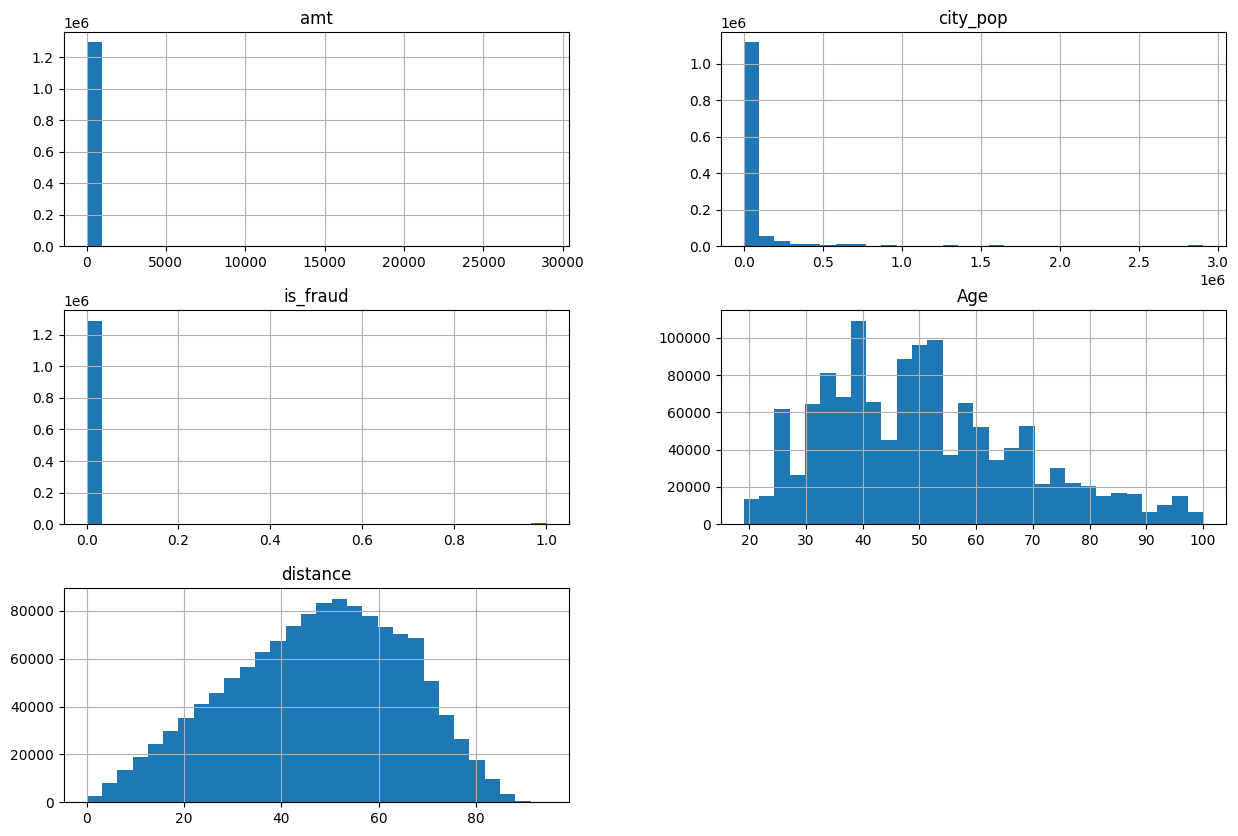

In [111]:
df_hist.hist(bins=30, figsize=(15, 10))

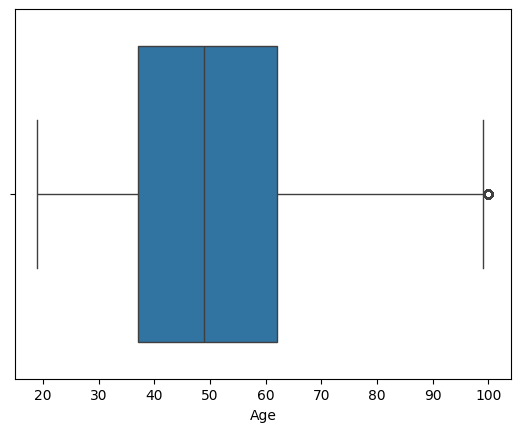

In [112]:
ax = sns.boxplot(x="Age", data=df_new) 

In [113]:
q75,q25 = np.percentile(df_new['Age'],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

Age_cleaned = []
for x in df_new['Age']:
  if x >= max:
    Age_cleaned.append(np.nan)
  elif x <= min:
    Age_cleaned.append(np.nan)
  else:
    Age_cleaned.append(x)

df_new['Age'] = Age_cleaned
print(df_new['Age'].isnull().sum())
df_new = df_new.dropna(axis = 0)

536


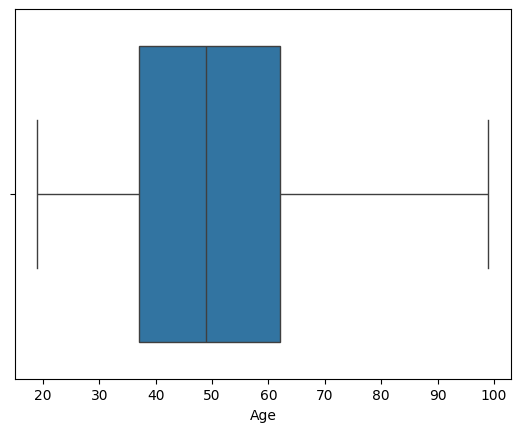

In [114]:
ax = sns.boxplot(x="Age", data=df_new) 

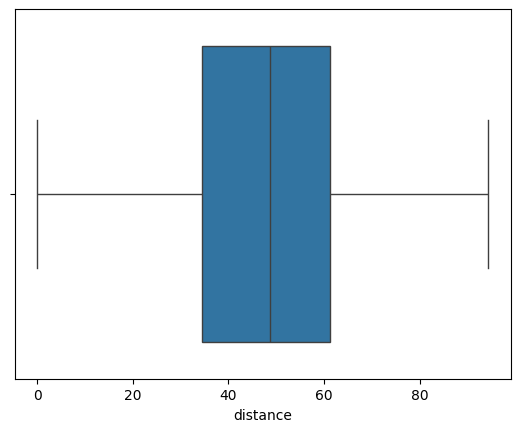

In [115]:
ax = sns.boxplot(x="distance", data=df_new) 

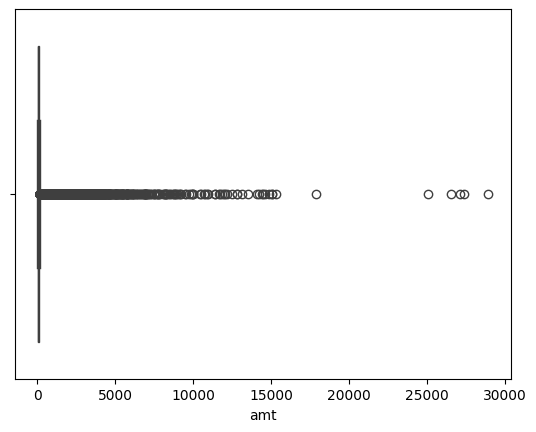

In [116]:
ax = sns.boxplot(x="amt", data=df_new) 

In [117]:
#q75,q25 = np.percentile(df_new['amt'],[75,25])
#intr_qr = q75-q25
#max = q75+(1.5*intr_qr)
#min = q25-(1.5*intr_qr)

#amt_cleaned = []
#for x in df_new['amt']:
#  if x >= max:
#    amt_cleaned.append(np.nan)
#  elif x <= min:
#    amt_cleaned.append(np.nan)
#  else:
#   amt_cleaned.append(x)

#df_new['Amt_cleaned'] = amt_cleaned
#print(df_new['Amt_cleaned'].isnull().sum())
#df_new = df_new.dropna(axis = 0)

In [118]:
#ax = sns.boxplot(x="amt", data=df_new) 

In [119]:
#ax = sns.boxplot(x="city_pop", data=df_new) 

In [120]:
#q75,q25 = np.percentile(df_new['city_pop'],[75,25])
#intr_qr = q75-q25
#max = q75+(1.5*intr_qr)
#min = q25-(1.5*intr_qr)

#city_pop_cleaned = []
#for x in df_new['city_pop']:
#  if x >= max:
 #   city_pop_cleaned.append(np.nan)
#  elif x <= min:
#    city_pop_cleaned.append(np.nan)
#  else:
#    city_pop_cleaned.append(x)


#df_new['City_pop_cleaned'] = city_pop_cleaned
#print(df_new['City_pop_cleaned'].isnull().sum())
#df_new = df_new.dropna(axis = 0)

In [121]:
#ax = sns.boxplot(x="city_pop", data=df_new) 

In [122]:
print('After removing outliers: ',len(df_new))

After removing outliers:  1296139


In [123]:
df_new = df_new[['merchant', 'category', 'amt',
       'gender', 'city', 'state','city_pop',
       'job','is_fraud', 'Age','Transaction Category', 'distance']]

In [124]:
numeric_columns = df_new.select_dtypes(include='number').columns
skewness = df_new[numeric_columns].skew()


In [125]:
skewness

amt         42.291680
city_pop     5.592617
is_fraud    13.026381
Age          0.609359
distance    -0.238237
dtype: float64

lambda for amt: 0.13143826822641644
lambda for city_pop: -0.10941758796993728
Skewness after transformations:
amt        -0.015549
city_pop    0.057617
dtype: float64


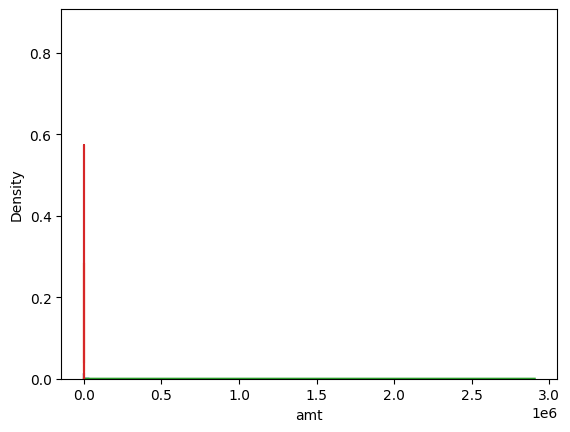

In [126]:
import seaborn as sns
from scipy.stats import boxcox

# Transform 'amt'
amt = df_new['amt']
sns.histplot(amt, kde=True, stat="density", common_norm=False)
transformed_amt_data, best_lambda_amt = boxcox(amt)
sns.histplot(transformed_amt_data, kde=True, stat="density", common_norm=False)
print('lambda for amt:', best_lambda_amt)

# Update 'amt' column in DataFrame
df_new['amt'] = transformed_amt_data

# Transform 'city_pop'
city_pop = df_new['city_pop']
sns.histplot(city_pop, kde=True, stat="density", common_norm=False)
transformed_pop_data, best_lambda_pop = boxcox(city_pop)
sns.histplot(transformed_pop_data, kde=True, stat="density", common_norm=False)
print('lambda for city_pop:', best_lambda_pop)

# Update 'city_pop' column in DataFrame
df_new['city_pop'] = transformed_pop_data

# Check skewness after transformations
skewness_after_transform = df_new[['amt', 'city_pop']].skew()
print('Skewness after transformations:')
print(skewness_after_transform)


In [105]:
df_new.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'city_pop',
       'job', 'is_fraud', 'Age', 'Transaction Category', 'distance'],
      dtype='object')

In [127]:
q66,q33 = np.percentile(df_new['Age'],[66,33])
age_category = []
for age in df_new['Age']:
  if age >= q66:
    age_category.append('old')
  elif age <= q33:
    age_category.append('middle aged')
  elif age > q33 and age < q66:
    age_category.append('young')

df_new['Age Category'] = age_category
df_new['Age Category'].value_counts()

Age Category
old            441851
middle aged    439930
young          414358
Name: count, dtype: int64

In [128]:
q66

56.0

In [129]:
q33

40.0

In [130]:
q66,q33 = np.percentile(df_new['distance'],[66,33])
distance_category = []
for distance in df_new['distance']:
  if distance >= q66:
    distance_category.append('far away distance')
  elif distance <= q33:
    distance_category.append('nearby distance')
  elif distance > q33 and distance < q66:
    distance_category.append('moderate distance')

df_new['Distance Category'] = distance_category
df_new['Distance Category'].value_counts()

Distance Category
far away distance    440687
moderate distance    427726
nearby distance      427726
Name: count, dtype: int64

In [131]:
q66

56.4090045083898

In [132]:
q33

39.51458312511411

In [133]:
q66,q33 = np.percentile(df_new['city_pop'],[66,33])
city_pop_category = []
for city_pop in df_new['city_pop']:
  if city_pop >= q66:
    city_pop_category.append('Highly Populated')
  elif city_pop <= q33:
    city_pop_category.append('Sparsely Populated ')
  elif city_pop > q33 and city_pop < q66:
    city_pop_category.append('Moderately Polulated')

df_new['Population Category'] = city_pop_category
df_new['Population Category'].value_counts()

Population Category
Highly Populated        443409
Sparsely Populated      428221
Moderately Polulated    424509
Name: count, dtype: int64

In [134]:
q66

5.640328239467187

In [135]:
q33

4.910818713222447

In [139]:
q66,q33 = np.percentile(df_new['amt'],[66,33])
amt_category = []
for amt in df_new['amt']:
  if amt >= q66:
    amt_category.append('Highly Expensive')
  elif amt <= q33:
    amt_category.append('Sparsely Expensive ')
  elif amt > q33 and amt < q66:
    amt_category.append('Moderately Expensive')

df_new['Amt Category'] = amt_category
df_new['Amt Category'].value_counts()

Amt Category
Highly Expensive        440766
Sparsely Expensive      427734
Moderately Expensive    427639
Name: count, dtype: int64

In [140]:
q66

5.679355014609812

In [141]:
q33

3.702776454030607

In [142]:

# Select numeric columns only
numeric_columns = df_new.select_dtypes(include='number').columns

# Calculate skewness for numeric columns
skewness = df_new[numeric_columns].skew()

# Display skewness
print('Skewness for numeric columns:')
print(skewness)

Skewness for numeric columns:
amt         -0.015549
city_pop     0.057617
is_fraud    13.026381
Age          0.609359
distance    -0.238237
dtype: float64


array([[<Axes: title={'center': 'amt'}>,
        <Axes: title={'center': 'city_pop'}>],
       [<Axes: title={'center': 'is_fraud'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'distance'}>, <Axes: >]], dtype=object)

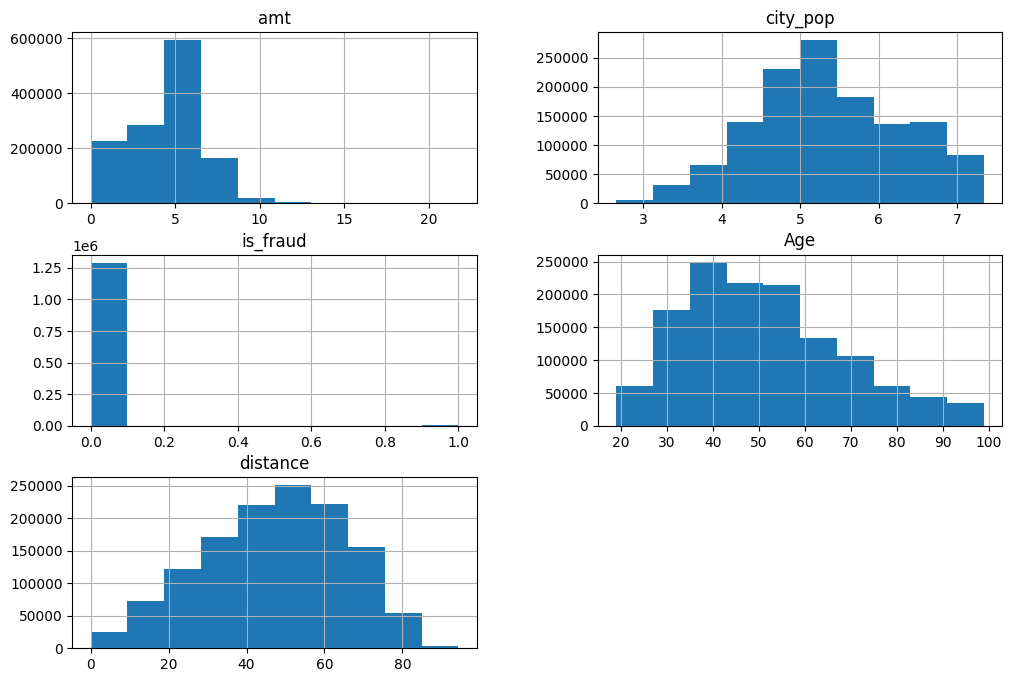

In [143]:
df_new.hist(bins=10, figsize=(12, 8))

In [144]:
category = df_new['category']
#category = category.replace({"misc_pos":"misc","misc_net":"misc","grocery_pos":"grocery","grocery_net":"grocery","shopping_pos":"shopping","shopping_net":"shopping"})

category = category.replace({"misc_pos":"misc","misc_net":"misc","grocery_pos":"grocery","grocery_net":"grocery"})
df_new['category'] = category
Fraud = df_new['is_fraud']
Fraud = Fraud.replace({0:"Not a fraud",1:"Fraud"})
df_new['is_fraud'] = Fraud


In [145]:
job = []
for j in df_new['job']:
  job.append(j.split(',')[0])
df_new['job'] = job 


In [146]:
df_new.head()

,merchant,category,amt,gender,city,state,city_pop,job,is_fraud,Age,Transaction Category,distance,Age Category,Distance Category,Population Category,Amt Category
0,"fraud_Rippin, Kub and Mann",misc,1.784903,F,Moravian Falls,NC,5.396492,Psychologist,Not a fraud,36.0,Forenoon Transaction,48.947783,middle aged,moderate distance,Moderately Polulated,Sparsely Expensive
1,"fraud_Heller, Gutmann and Zieme",grocery,6.456856,F,Orient,WA,3.853288,Special educational needs teacher,Not a fraud,46.0,Forenoon Transaction,18.775736,young,nearby distance,Sparsely Populated,Highly Expensive
2,fraud_Lind-Buckridge,entertainment,7.851196,M,Malad City,ID,5.466569,Nature conservation officer,Not a fraud,62.0,Forenoon Transaction,67.172035,old,far away distance,Moderately Polulated,Highly Expensive
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,4.939838,M,Boulder,MT,5.147266,Patent attorney,Not a fraud,57.0,Forenoon Transaction,59.455974,old,far away distance,Moderately Polulated,Moderately Expensive
4,fraud_Keeling-Crist,misc,4.825007,M,Doe Hill,VA,3.611461,Dance movement psychotherapist,Not a fraud,38.0,Forenoon Transaction,48.282030,middle aged,moderate distance,Sparsely Populated,Moderately Expensive


In [147]:
df_cat = df_new[['merchant', 'category','gender', 'city', 'state',
       'job','is_fraud','Transaction Category', 'Age Category','Distance Category',
       'Population Category', 'Amt Category' ]]
df_cat.head()

,merchant,category,gender,city,state,job,is_fraud,Transaction Category,Age Category,Distance Category,Population Category,Amt Category
0,"fraud_Rippin, Kub and Mann",misc,F,Moravian Falls,NC,Psychologist,Not a fraud,Forenoon Transaction,middle aged,moderate distance,Moderately Polulated,Sparsely Expensive
1,"fraud_Heller, Gutmann and Zieme",grocery,F,Orient,WA,Special educational needs teacher,Not a fraud,Forenoon Transaction,young,nearby distance,Sparsely Populated,Highly Expensive
2,fraud_Lind-Buckridge,entertainment,M,Malad City,ID,Nature conservation officer,Not a fraud,Forenoon Transaction,old,far away distance,Moderately Polulated,Highly Expensive
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,Boulder,MT,Patent attorney,Not a fraud,Forenoon Transaction,old,far away distance,Moderately Polulated,Moderately Expensive
4,fraud_Keeling-Crist,misc,M,Doe Hill,VA,Dance movement psychotherapist,Not a fraud,Forenoon Transaction,middle aged,moderate distance,Sparsely Populated,Moderately Expensive


In [148]:
merc = []
for m in df_cat['merchant']:
    merc.append(m.split(' ')[0])

# Create a copy of the DataFrame before modifying it
df_cat_copy = df_cat.copy()

# Modify the copy
df_cat_copy['merchant'] = merc

# Now df_cat_copy is modified without triggering the warning


In [149]:
df_cat_copy.drop(['merchant', 'city'], axis=1, inplace=True)

In [150]:
df_cat_copy.head()

,category,gender,state,job,is_fraud,Transaction Category,Age Category,Distance Category,Population Category,Amt Category
0,misc,F,NC,Psychologist,Not a fraud,Forenoon Transaction,middle aged,moderate distance,Moderately Polulated,Sparsely Expensive
1,grocery,F,WA,Special educational needs teacher,Not a fraud,Forenoon Transaction,young,nearby distance,Sparsely Populated,Highly Expensive
2,entertainment,M,ID,Nature conservation officer,Not a fraud,Forenoon Transaction,old,far away distance,Moderately Polulated,Highly Expensive
3,gas_transport,M,MT,Patent attorney,Not a fraud,Forenoon Transaction,old,far away distance,Moderately Polulated,Moderately Expensive
4,misc,M,VA,Dance movement psychotherapist,Not a fraud,Forenoon Transaction,middle aged,moderate distance,Sparsely Populated,Moderately Expensive


In [151]:
df_cat_fraud = df_cat_copy[df_cat['is_fraud'] == 'Fraud']
len(df_cat_fraud)

7506

In [152]:
#sample 50k datapoints stratified
df_sample = df_cat_copy.sample(n = 2000)

In [153]:
print(type(df_sample))
print(type(df_cat_fraud))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [154]:
df_cat_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7506 entries, 2449 to 1295733
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              7506 non-null   object
 1   gender                7506 non-null   object
 2   state                 7506 non-null   object
 3   job                   7506 non-null   object
 4   is_fraud              7506 non-null   object
 5   Transaction Category  7506 non-null   object
 6   Age Category          7506 non-null   object
 7   Distance Category     7506 non-null   object
 8   Population Category   7506 non-null   object
 9   Amt Category          7506 non-null   object
dtypes: object(10)
memory usage: 645.0+ KB


In [155]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 456324 to 639491
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              2000 non-null   object
 1   gender                2000 non-null   object
 2   state                 2000 non-null   object
 3   job                   2000 non-null   object
 4   is_fraud              2000 non-null   object
 5   Transaction Category  2000 non-null   object
 6   Age Category          2000 non-null   object
 7   Distance Category     2000 non-null   object
 8   Population Category   2000 non-null   object
 9   Amt Category          2000 non-null   object
dtypes: object(10)
memory usage: 171.9+ KB


In [156]:
df_samplex = pd.concat([df_sample, df_cat_fraud], ignore_index=True)


In [157]:
df_samplex.columns

Index(['category', 'gender', 'state', 'job', 'is_fraud',
       'Transaction Category', 'Age Category', 'Distance Category',
       'Population Category', 'Amt Category'],
      dtype='object')

In [158]:
df_samplex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9506 entries, 0 to 9505
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              9506 non-null   object
 1   gender                9506 non-null   object
 2   state                 9506 non-null   object
 3   job                   9506 non-null   object
 4   is_fraud              9506 non-null   object
 5   Transaction Category  9506 non-null   object
 6   Age Category          9506 non-null   object
 7   Distance Category     9506 non-null   object
 8   Population Category   9506 non-null   object
 9   Amt Category          9506 non-null   object
dtypes: object(10)
memory usage: 742.8+ KB


In [159]:
!pip install --upgrade beautifulsoup4

  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.8.2
    Uninstalling beautifulsoup4-4.8.2:
      Successfully uninstalled beautifulsoup4-4.8.2


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textract 1.6.5 requires beautifulsoup4~=4.8.0, but you have beautifulsoup4 4.12.2 which is incompatible.
textract 1.6.5 requires six~=1.12.0, but you have six 1.16.0 which is incompatible.


In [141]:
!pip install --upgrade textract

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.31 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.8.2 which is incompatible.


  Using cached beautifulsoup4-4.8.2-py3-none-any.whl (106 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.2
    Uninstalling beautifulsoup4-4.12.2:
      Successfully uninstalled beautifulsoup4-4.12.2


In [138]:
!pip install --upgrade mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 2.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 3.2 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 3.8 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.4 MB 4.6 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [160]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

In [161]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
ohenc = OneHotEncoder()
ohenc.fit(df_samplex)
#ohenc.fit(df_cat)
df_ohenc = ohenc.transform(df_samplex)
#df_ohenc = ohenc.transform(df_cat)

In [162]:
#OneHotEncoder  instance
df_ohenc

<9506x494 sparse matrix of type '<class 'numpy.float64'>'
	with 95060 stored elements in Compressed Sparse Row format>

In [163]:
# Replace get_feature_names with get_feature_names_out
feature_names = ohenc.get_feature_names_out()

# Update the columns of your DataFrame
df_ohenc.columns = feature_names


In [164]:
feature_names

array(['category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc', 'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV

In [166]:
df_final = pd.DataFrame(df_ohenc.toarray())

In [167]:
df_final.columns = ohenc.get_feature_names_out()


In [168]:
df_final

,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping_net,...,Age Category_young,Distance Category_far away distance,Distance Category_moderate distance,Distance Category_nearby distance,Population Category_Highly Populated,Population Category_Moderately Polulated,Population Category_Sparsely Populated,Amt Category_Highly Expensive,Amt Category_Moderately Expensive,Amt Category_Sparsely Expensive
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9503,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9504,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [169]:
# importing the required module
from mlxtend.frequent_patterns import apriori, association_rules


# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.
frequent_itemsets = apriori(df_final, min_support=0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# printing the frequent itemset
frequent_itemsets

C:\python\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.039028,(category_entertainment),1
1,0.031033,(category_food_dining),1
2,0.087313,(category_gas_transport),1
3,0.222701,(category_grocery),1
4,0.028824,(category_health_fitness),1
...,...,...,...
13402,0.006838,"(Amt Category_Highly Expensive, Population Cat...",7
13403,0.007364,"(Amt Category_Highly Expensive, Transaction Ca...",7
13404,0.008205,"(Amt Category_Highly Expensive, Transaction Ca...",7
13405,0.005155,"(Amt Category_Highly Expensive, gender_F, cate...",8


In [170]:
for i in range(len(frequent_itemsets)):
  if 'x4_Fraud' in frequent_itemsets['itemsets'][i]:
    if frequent_itemsets['length'][i] > 6:
      print(frequent_itemsets['itemsets'][i],frequent_itemsets['length'][i])

In [171]:
frequent_itemsets = apriori(df_final, min_support=0.01, use_colnames=True)
frequent_itemsets

C:\python\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.039028,(category_entertainment)
1,0.031033,(category_food_dining)
2,0.087313,(category_gas_transport)
3,0.222701,(category_grocery)
4,0.028824,(category_health_fitness)
...,...,...
6016,0.011677,"(Amt Category_Highly Expensive, Transaction Ca..."
6017,0.011887,"(Amt Category_Highly Expensive, Transaction Ca..."
6018,0.013150,"(Amt Category_Highly Expensive, Population Cat..."
6019,0.013255,"(Amt Category_Highly Expensive, Transaction Ca..."


In [172]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.005)
rules.to_csv('outtrain.csv', index=False)

In [173]:
import pandas as pd
df = pd.read_csv('outtrain.csv')
#df.describe()

In [174]:
df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'category_entertainment'}),frozenset({'gender_F'}),0.039028,0.508205,0.022722,0.582210,1.145620,0.002888,1.177134,0.132273
1,frozenset({'gender_F'}),frozenset({'category_entertainment'}),0.508205,0.039028,0.022722,0.044711,1.145620,0.002888,1.005949,0.258462
2,frozenset({'gender_M'}),frozenset({'category_entertainment'}),0.491795,0.039028,0.016305,0.033155,0.849521,-0.002888,0.993926,-0.258462
3,frozenset({'category_entertainment'}),frozenset({'gender_M'}),0.039028,0.491795,0.016305,0.417790,0.849521,-0.002888,0.872890,-0.155640
4,frozenset({'is_fraud_Fraud'}),frozenset({'category_entertainment'}),0.790659,0.039028,0.024511,0.031001,0.794316,-0.006347,0.991716,-0.552963


In [199]:
filtered_df = df[df['consequents'].str.contains('is_fraud')]

In [200]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6402 entries, 59 to 102410
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         6402 non-null   object 
 1   consequents         6402 non-null   object 
 2   antecedent support  6402 non-null   float64
 3   consequent support  6402 non-null   float64
 4   support             6402 non-null   float64
 5   confidence          6402 non-null   float64
 6   lift                6402 non-null   float64
 7   leverage            6402 non-null   float64
 8   conviction          6402 non-null   float64
 9   zhangs_metric       6402 non-null   float64
dtypes: float64(8), object(2)
memory usage: 550.2+ KB


In [201]:
filtered_df.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
59,category_gas_transport,is_fraud_Fraud,0.087313,0.790659,0.065327,0.748193,0.946291,-0.003708,0.831356,-0.058547
101,category_grocery,is_fraud_Fraud,0.222701,0.790659,0.197665,0.887577,1.122579,0.021584,1.862084,0.140479
215,category_misc,is_fraud_Fraud,0.144540,0.790659,0.122870,0.850073,1.075145,0.008588,1.396287,0.081702
287,category_shopping_net,is_fraud_Fraud,0.196823,0.790659,0.180202,0.915553,1.157963,0.024582,2.478974,0.169844
321,category_shopping_pos,is_fraud_Fraud,0.108247,0.790659,0.088786,0.820214,1.037381,0.003199,1.164391,0.040408
405,gender_F,is_fraud_Fraud,0.508205,0.790659,0.393646,0.774581,0.979665,-0.008171,0.928676,-0.040497
406,gender_F,is_fraud_Not a fraud,0.508205,0.209341,0.114559,0.225419,1.076801,0.008171,1.020757,0.145027
478,gender_M,is_fraud_Fraud,0.491795,0.790659,0.397012,0.807273,1.021013,0.008171,1.086206,0.040497
480,gender_M,is_fraud_Not a fraud,0.491795,0.209341,0.094782,0.192727,0.920636,-0.008171,0.979419,-0.145027
536,state_CA,is_fraud_Fraud,0.044077,0.790659,0.034399,0.780430,0.987063,-0.000451,0.953414,-0.013526


In [202]:
filtered_df.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')

In [203]:
filtered_df.describe()

C:\python\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000,6402.000000
mean,0.268751,0.297789,0.054617,0.330538,1.121841,0.004357,inf,0.128290
std,0.202499,0.232827,0.037394,0.260262,0.240021,0.007205,NaN,0.190507
min,0.030717,0.030191,0.030086,0.037627,0.434568,-0.072434,0.318921,-0.780493
25%,0.111114,0.117400,0.034505,0.130276,1.004822,0.000238,1.000710,0.007337
50%,0.211551,0.213234,0.042079,0.242579,1.079689,0.003319,1.017989,0.102018
75%,0.340522,0.393646,0.058910,0.443167,1.184703,0.007376,1.077155,0.209518
max,0.799600,0.790659,0.637177,1.000000,6.388364,0.072434,inf,1.000000


In [204]:
filtered_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6402 entries, 59 to 102410
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         6402 non-null   object 
 1   consequents         6402 non-null   object 
 2   antecedent support  6402 non-null   float64
 3   consequent support  6402 non-null   float64
 4   support             6402 non-null   float64
 5   confidence          6402 non-null   float64
 6   lift                6402 non-null   float64
 7   leverage            6402 non-null   float64
 8   conviction          6402 non-null   float64
 9   zhangs_metric       6402 non-null   float64
dtypes: float64(8), object(2)
memory usage: 550.2+ KB


In [205]:
filtered_df2.duplicated().sum()

0

In [206]:
filtered_df3.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
59,category_gas_transport,is_fraud_Fraud,0.087313,0.790659,0.065327,0.748193,0.946291,-0.003708,0.831356,-0.058547
101,category_grocery,is_fraud_Fraud,0.222701,0.790659,0.197665,0.887577,1.122579,0.021584,1.862084,0.140479
215,category_misc,is_fraud_Fraud,0.144540,0.790659,0.122870,0.850073,1.075145,0.008588,1.396287,0.081702
287,category_shopping_net,is_fraud_Fraud,0.196823,0.790659,0.180202,0.915553,1.157963,0.024582,2.478974,0.169844
321,category_shopping_pos,is_fraud_Fraud,0.108247,0.790659,0.088786,0.820214,1.037381,0.003199,1.164391,0.040408
405,gender_F,is_fraud_Fraud,0.508205,0.790659,0.393646,0.774581,0.979665,-0.008171,0.928676,-0.040497
406,gender_F,is_fraud_Not a fraud,0.508205,0.209341,0.114559,0.225419,1.076801,0.008171,1.020757,0.145027
478,gender_M,is_fraud_Fraud,0.491795,0.790659,0.397012,0.807273,1.021013,0.008171,1.086206,0.040497
480,gender_M,is_fraud_Not a fraud,0.491795,0.209341,0.094782,0.192727,0.920636,-0.008171,0.979419,-0.145027
536,state_CA,is_fraud_Fraud,0.044077,0.790659,0.034399,0.780430,0.987063,-0.000451,0.953414,-0.013526


In [207]:
filtered_df3['antecedents'] = filtered_df3['antecedents'].astype(str)

In [208]:
filtered_df3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
59,category_gas_transport,is_fraud_Fraud,0.087313,0.790659,0.065327,0.748193,0.946291,-0.003708,0.831356,-0.058547
101,category_grocery,is_fraud_Fraud,0.222701,0.790659,0.197665,0.887577,1.122579,0.021584,1.862084,0.140479
215,category_misc,is_fraud_Fraud,0.144540,0.790659,0.122870,0.850073,1.075145,0.008588,1.396287,0.081702
287,category_shopping_net,is_fraud_Fraud,0.196823,0.790659,0.180202,0.915553,1.157963,0.024582,2.478974,0.169844
321,category_shopping_pos,is_fraud_Fraud,0.108247,0.790659,0.088786,0.820214,1.037381,0.003199,1.164391,0.040408
...,...,...,...,...,...,...,...,...,...,...
102406,Amt Category_Highly Expensive,"Population Category_Highly Populated', 'Transa...",0.688723,0.037134,0.030086,0.043684,1.176378,0.004511,1.006849,0.481670
102407,Population Category_Highly Populated,"Amt Category_Highly Expensive', 'Transaction C...",0.353566,0.084473,0.030086,0.085094,1.007349,0.000219,1.000678,0.011285
102408,Transaction Category_Afternoon Transaction,"Amt Category_Highly Expensive', 'Population Ca...",0.799600,0.037134,0.030086,0.037627,1.013254,0.000394,1.000511,0.065274
102409,Distance Category_nearby distance,"Amt Category_Highly Expensive', 'Population Ca...",0.325163,0.096991,0.030086,0.092527,0.953968,-0.001452,0.995080,-0.066732


In [209]:
df = filtered_df3

In [210]:
# Assuming df is your DataFrame and 'antecedents' is the column
df['antecedents'] = df['antecedents'].astype(str)

# Remove the frozenset structure
df['antecedents'] = df['antecedents'].str.replace(r"frozenset\({'(.+?)'}\)", r'\1', regex=True)


In [211]:
# Assuming df is your DataFrame and 'antecedents' is the column
df['consequents'] = df['consequents'].astype(str)

# Remove the frozenset structure
df['consequents'] = df['consequents'].str.replace(r"frozenset\({'(.+?)'}\)", r'\1', regex=True)


In [212]:
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
59,category_gas_transport,is_fraud_Fraud,0.087313,0.790659,0.065327,0.748193,0.946291,-0.003708,0.831356,-0.058547
101,category_grocery,is_fraud_Fraud,0.222701,0.790659,0.197665,0.887577,1.122579,0.021584,1.862084,0.140479
215,category_misc,is_fraud_Fraud,0.144540,0.790659,0.122870,0.850073,1.075145,0.008588,1.396287,0.081702
287,category_shopping_net,is_fraud_Fraud,0.196823,0.790659,0.180202,0.915553,1.157963,0.024582,2.478974,0.169844
321,category_shopping_pos,is_fraud_Fraud,0.108247,0.790659,0.088786,0.820214,1.037381,0.003199,1.164391,0.040408
...,...,...,...,...,...,...,...,...,...,...
102406,Amt Category_Highly Expensive,"Population Category_Highly Populated', 'Transa...",0.688723,0.037134,0.030086,0.043684,1.176378,0.004511,1.006849,0.481670
102407,Population Category_Highly Populated,"Amt Category_Highly Expensive', 'Transaction C...",0.353566,0.084473,0.030086,0.085094,1.007349,0.000219,1.000678,0.011285
102408,Transaction Category_Afternoon Transaction,"Amt Category_Highly Expensive', 'Population Ca...",0.799600,0.037134,0.030086,0.037627,1.013254,0.000394,1.000511,0.065274
102409,Distance Category_nearby distance,"Amt Category_Highly Expensive', 'Population Ca...",0.325163,0.096991,0.030086,0.092527,0.953968,-0.001452,0.995080,-0.066732


In [253]:
# Function to count words in a string
def count_words(text):
    return len(text.split())

# Filter rows where 'TextColumn' has more than 2 words
df2 = df[df['antecedents'].apply(lambda x: count_words(x) > 7)]

In [254]:
df2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8387,"Population Category_Sparsely Populated ', 'Dis...",is_fraud_Fraud,0.110562,0.790659,0.086156,0.779258,0.985581,-0.001260,0.948353,-0.016183
11031,"category_gas_transport', 'Amt Category_Sparsel...",is_fraud_Fraud,0.049337,0.790659,0.049337,1.000000,1.264768,0.010328,inf,0.220206
13131,"Distance Category_far away distance', 'categor...",is_fraud_Fraud,0.057227,0.790659,0.050494,0.882353,1.115972,0.005247,1.779402,0.110228
13201,"Population Category_Sparsely Populated ', 'cat...",is_fraud_Fraud,0.058279,0.790659,0.053124,0.911552,1.152903,0.007046,2.366840,0.140832
13690,"Amt Category_Highly Expensive', 'Distance Cate...",is_fraud_Fraud,0.065012,0.790659,0.059436,0.914239,1.156301,0.008034,2.441001,0.144572


In [255]:
df2.describe()

C:\python\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,0.093911,0.533998,0.046252,0.594818,1.131686,0.004910,inf,0.119151
std,0.051743,0.236548,0.020726,0.259859,0.128618,0.004749,NaN,0.107852
min,0.031349,0.072165,0.030086,0.131760,0.844061,-0.010829,0.629341,-0.167328
25%,0.052335,0.318430,0.033268,0.347956,1.048561,0.001833,1.032614,0.051736
50%,0.081738,0.616979,0.038818,0.620351,1.124480,0.004954,1.113708,0.123459
75%,0.114559,0.790659,0.050074,0.859226,1.189706,0.007139,1.582977,0.177325
max,0.245108,0.790659,0.227225,1.000000,1.825812,0.033428,inf,0.599157


In [256]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 8387 to 102381
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         906 non-null    object 
 1   consequents         906 non-null    object 
 2   antecedent support  906 non-null    float64
 3   consequent support  906 non-null    float64
 4   support             906 non-null    float64
 5   confidence          906 non-null    float64
 6   lift                906 non-null    float64
 7   leverage            906 non-null    float64
 8   conviction          906 non-null    float64
 9   zhangs_metric       906 non-null    float64
dtypes: float64(8), object(2)
memory usage: 77.9+ KB


In [257]:


# Assuming 'X' is the column you want to check for duplicates
df_no_duplicates = df2.drop_duplicates(subset='antecedents', keep='first')

In [258]:
df_no_duplicates.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8387,"Population Category_Sparsely Populated ', 'Dis...",is_fraud_Fraud,0.110562,0.790659,0.086156,0.779258,0.985581,-0.001260,0.948353,-0.016183
11031,"category_gas_transport', 'Amt Category_Sparsel...",is_fraud_Fraud,0.049337,0.790659,0.049337,1.000000,1.264768,0.010328,inf,0.220206
13131,"Distance Category_far away distance', 'categor...",is_fraud_Fraud,0.057227,0.790659,0.050494,0.882353,1.115972,0.005247,1.779402,0.110228
13201,"Population Category_Sparsely Populated ', 'cat...",is_fraud_Fraud,0.058279,0.790659,0.053124,0.911552,1.152903,0.007046,2.366840,0.140832
13690,"Amt Category_Highly Expensive', 'Distance Cate...",is_fraud_Fraud,0.065012,0.790659,0.059436,0.914239,1.156301,0.008034,2.441001,0.144572
13844,"Amt Category_Highly Expensive', 'Population Ca...",is_fraud_Fraud,0.066274,0.790659,0.060383,0.911111,1.152345,0.007983,2.355092,0.141588
16281,"Distance Category_far away distance', 'Transac...",is_fraud_Fraud,0.038186,0.790659,0.032611,0.853994,1.080105,0.002419,1.433792,0.077109
16351,"Population Category_Sparsely Populated ', 'Tra...",is_fraud_Fraud,0.036924,0.790659,0.032506,0.880342,1.113429,0.003311,1.749497,0.105779
16686,"Amt Category_Highly Expensive', 'Distance Cate...",is_fraud_Fraud,0.037555,0.790659,0.035662,0.949580,1.200999,0.005968,4.151939,0.173890
16840,"Amt Category_Highly Expensive', 'Population Ca...",is_fraud_Fraud,0.036188,0.790659,0.035136,0.970930,1.228002,0.006524,7.201347,0.192640


In [259]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 8387 to 102350
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         363 non-null    object 
 1   consequents         363 non-null    object 
 2   antecedent support  363 non-null    float64
 3   consequent support  363 non-null    float64
 4   support             363 non-null    float64
 5   confidence          363 non-null    float64
 6   lift                363 non-null    float64
 7   leverage            363 non-null    float64
 8   conviction          363 non-null    float64
 9   zhangs_metric       363 non-null    float64
dtypes: float64(8), object(2)
memory usage: 31.2+ KB


In [260]:
#filtered_df4 = filtered_df[filtered_df['support']>0.04]
#filtered_df5 = filtered_df4[filtered_df['confidence']>0.7]
#filtered_df6 = filtered_df5[filtered_df['leverage']>0.006]


In [261]:
df_no_duplicates.to_csv('finals_rules_fraud.csv', index=False)

In [72]:
#filtered_df6.tail()

In [73]:
#filtered_df6.info()